<h1> End-to-end Example of a Machine Learning Pipeline - Part I: Data Procesing </h1>

As the title suggests, this tutorial is an end-to-end example of solving a real-world problem. We’ll be using Machine Learning to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc. The tutorial walks through the various stages of the ML workflow. In particular, part I of the tutorial (this notebook) has the following sections: 

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#overview">Overview and Data Description</a></li>
        <li><a href="#understand">Understanding the data </a></li>
        <li><a href="#scale">Scaling the data</a></li>
        <li><a href="#impute">Imputing the data</a></li>
        <li><a href="#save">Saving the newly generated dataset</a></li>
    </ol>
</div>
<br>
<hr>

<h2 id="overview">Overview and data description</h2>


<h4> Dataset </h4> 
The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the <a href ="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database"> Pima Indians Diabetes Database </a>. 

The Pima Indians have the highest rate of type 2 diabetes in the world with 34.2% for Pima men and 40.8% for Pima women compared to 9.3% in the United States (U.S.) general population and 16% in Native Americans amongst all tribes (Centers for Disease Control and Prevention, 2014; Schulz, 2006)

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.

The following features have been provided to help us predict whether a person is diabetic or not:

    - Pregnancies: Number of times pregnant
    - Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
    - BloodPressure: Diastolic blood pressure (mm Hg)
    - SkinThickness: Triceps skin fold thickness (mm)
    - Insulin: 2-Hour serum insulin (mu U/ml)
    - BMI: Body mass index (weight in kg/(height in m)2)
    - DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
    - Age: Age (years)
    - Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

<h4> Packages </h4>
Apart from the regular packages for data handling and machine learning, we'll be using the seaborn package, in addition to matplotlib, for visualizations. Moreover, we will use joblib available in sklearn to save our model for future use. We will perform classification using Random Forest. 


<h2 id="understand">Understanding the data</h2>

<h4>1. Read the dataset into a dataframe using Pandas </h4>


In [315]:
import pandas as pd

path_to_file ="/Users/babylon/Documents/Teaching/ML/ML2022/Week2/EndtoEnd/pima-indians-diabetes.csv"
pima_data = pd.read_csv(path_to_file, encoding='utf-8')

Let's get to know the dataset a little bit better...

In [316]:
pima_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No null values, great!!

Let's take a look at the actual data and summaries: 

In [317]:
pima_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [318]:
pima_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- The Question creeping out of this summary:
    - Can minimum value of below listed columns be zero (0)?
- On some columns, a value of zero does not make sense and thus indicates missing value. Following columns or variables have an invalid zero value:

    - Glucose
    - BloodPressure
    - SkinThickness
    - Insulin
    - BMI
- Looking at the dataset, it seems that missing values were replaced by zero (convenient, but not very good).
- Let's investigate the amount of zeros in the dataset first: 


In [319]:
print((pima_data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",
                 "DiabetesPedigreeFunction", "Age"]] == 0).sum())

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


- Quite a large proportion of zeros in SkinThickness and Insulin!
- It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values, especially for the variables with a high number of zeros (missingness). 

- For this practial, I'm going to keep different versions of the dataset to be able to compare the effect of imputation on the quality  of our predictions. 


In [320]:
X_original = pima_data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y = pima_data["Outcome"]


<b> Your Task: </b> 
- Replace 0 with NaN (remember: NaN lives in Numpy!) (if stuck, google 'pandas.replace' and remember nan is: np.NaN)
- Call the new DF: X_nans

In [321]:
##### Your Solution Here #####

import numpy as np
X_nans = X_original.replace(0,np.NaN)

In [322]:
X_nans.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33


In [323]:
X_nans.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


- Makes more sense now?
- We can now visualise the missingness. We can do it in multiple ways in python. Let's visualising using the searborn packages (because it's great :)


<b>Your Task:</b> Visualise the Dataframe Missignness Using Seaborn:

- You will work independently using code examples I found on the web (good practice)
    - Raise your hand if you're stuck. I'll come to help. 
- Need to: import the searborn package. 
    - Note: searborn may or may not have been installed on your Anaconda distribution. If your import fails, you can install searborn: 
        - Directly from the Anaconda prompt (conda install -c anaconda seaborn) 
        - Full information is available on: https://anaconda.org/anaconda/seaborn
- The blog post below details two visualisation methods from searborn: heatmaps and displot. 
     
    - hhttps://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
    - I like how displot looks better :)  
    - Please note the following in the code snippet provided in the blog: 
    - For each column in a given pandas dataframe df, df.isna() provides whether or not each column value is null. 
    - Try to print out X_nans.isna()
    


In [324]:
X_nans.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False
764,False,False,False,False,True,False,False,False
765,False,False,False,False,False,False,False,False
766,False,False,False,True,True,False,False,False


<Figure size 720x432 with 0 Axes>

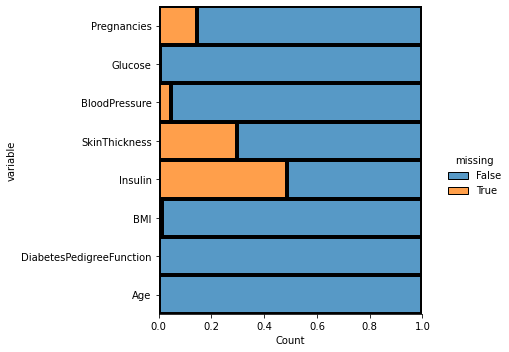

In [325]:
##### Your Solution Here #####
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.displot(
    data=X_nans.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png")

<h2 id="scale">Scaling the data</h2>

- Remember: we will have to try different algorithms (e.g. forests, SVMs, etc..)
- Some will require normalised data (in the range: [0,1]), but others won't. 
- Those algorithms that do not require scaling are not harmed by scaling. 
- Also note that there are some cases where even random forest may benefit from scaling. e.g.: 
    - https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf
-Takeaway message: if you're trying out multiple algorithms, scale first then apply your algorithms. 
    - It's good for uniformity of testing anyway!

Let's first save the original X_nans so that we can compare it to the scaled version

In [326]:
X_nans_unscaled = X_nans.copy()
#Why did I use .copy()? Ask me!

<b> Your Task </b> 
- Scale X_nans using StandardScaler (available from sklearn.preproessing)
- Follow the example given at the bottom of the sklearn page: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- Deviation from the example: instead of printing the scaled dataset, save it back in the variable X_nans
- When you're done, print out the following to see the difference: 
    - X_nan_unscaled.head()
    - X_nan.head()


In [327]:
##### Your Solution Here #####

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

X_nans = pd.DataFrame(scaler.fit_transform(X_nans))
X_nans_unscaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33


In [328]:
X_nans.head()

,0,1,2,3,4,5,6,7
0,0.468243,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995
1,-1.087043,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672
2,1.090358,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584
3,-1.087043,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549
4,NaN,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496


<h2 id="impute">Imputing the data</h2>

- Why did we perform scaling before imputation?
- We will implement two imputers: 
    - A simple imputer using the mean to impute missing values. 
    - A more sophisticated imputer that uses KNN. 
    - I will implement the KNNImputer for you, then you'll have to do mean imputation on your own!!!
    - Remember: we will use: X_nans from now on!

In [329]:
from sklearn.impute import KNNImputer
X_knn = X_nans.copy()

imputer = KNNImputer(n_neighbors=2)
X_knn_imputed = imputer.fit_transform(X_knn)


<b> Your Task </b>: Now it's your turn to implement the mean imputation. Guidance: 

    - Use the SimpleImputer class: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
    - the 'strategy' parameter dictates the statistic used to impute (e.g. 'mean' - default)
    - Save the new variable into X_mean_imputed
    - Do not forget to use .copy() when needed

In [330]:
##### Your Solution Here #####

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') 

X_mean = X_nans.copy()
imputer.fit(X_mean)
X_mean_imputed = imputer.transform(X_mean)


- The next question is: which imputed data to choose?
- There are many strategies (including using test statistics, e.g. variance, of the resulting data to judge goodness of imputation)
- I will follow the strategy: 
    - Build different classifiers using the two imputed datasets
    - Select the dataset that generates the best performance. 
- Advantage of the above strategy: 
    - Two birds in one stone :) 
    - You get to 'scope out' different algorithms in addition to 'scoping out' different imputation techniques. 
- To simply your task: use default parameters and simply the models as much as possible. 
- I will implement two RF classifiers, using X_mean_imputed and X_knn_imputed as training/testing data. 
- You will implement two SVMs in return :) 

In [331]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_knn_imputed, y, test_size = 0.2, random_state = 42)

#Feed data into Random Forest Algorithm
clf1 = RandomForestClassifier( random_state=42)
clf1.fit(X_train, y_train)
y_knn = clf1.predict(X_test)

#Check performance
print(" Classification report of RF using KNN Imputation : ")

print(classification_report(y_test,y_knn))

X_train, X_test, y_train, y_test = train_test_split(X_mean_imputed, y, test_size = 0.2, random_state = 42)
clf2 = RandomForestClassifier(random_state=42)
clf2.fit(X_train, y_train)
y_mean = clf2.predict(X_test)

print(" Classification report of  RF using Mean Imputation : ")

print(classification_report(y_test,y_mean))


 Classification report of RF using KNN Imputation : 
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

 Classification report of  RF using Mean Imputation : 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



<b> Your Task: </b> Build two SVM classifiers. 
    - One using X_knn_imputed in its train_test_split
    - One using X_mean_imputed in its train_test_split

In [332]:

from sklearn import svm
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_knn_imputed, y, test_size = 0.2, random_state = 42)
svm_linear1 = svm.SVC(kernel='linear')
svm_linear1.fit(X_train, y_train) 

y_knn= svm_linear1.predict(X_test)
print(" Classification report of linear SVM using KNN Imputation : ")
print(classification_report(y_test,y_knn))


X_train, X_test, y_train, y_test = train_test_split(X_mean_imputed, y, test_size = 0.2, random_state = 42)

svm_linear2 = svm.SVC(kernel='linear')
svm_linear2.fit(X_train, y_train) 

y_mean= svm_linear2.predict(X_test)
print(" Classification report of linear SVM using Mean Imputation : ")
print(classification_report(y_test,y_mean))



 Classification report of linear SVM using KNN Imputation : 
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

 Classification report of linear SVM using Mean Imputation : 
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



- Both classifiers performed better (on the minority-positive) class with knn imputation
- Now let's take our favourite model and try to improve it! (next practical). 
    - I chose the RF model!

<h2 id="save">Save the Dataset</h2>

- Do not forget to save the imputed & scaled dataframe (X_knn_imputed) 
    - We will use to_csv by Pandas
    - Also, we shouldn't forget the outcome (y) :)
    - Guidance: 
        - X_knn_imputed is a 2D array. It needs to be converted into a dataframe via pd.DataFrame(myarray)
        - But arrays do not have column names, need to add column names 
        - You can then add 'outcome' as a new column to your dataframe 
        - once you've done all of the above, you can save the dataframe to a csv (using P
            - Lookup the parameter 'index' in to_csv() - what do you want to set index to?
    

In [333]:
favourite_data = pd.DataFrame(X_knn_imputed, columns = X_original.columns) 
favourite_data['Outcome'] = y
favourite_data.shape
favourite_data.to_csv("FavouriteData.csv", index=False)